<a href="https://colab.research.google.com/github/UtkarshSharma-004/New_Edunet_GreenSkillsInternship/blob/main/3weekProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import gradio as gr

In [ ]:
trainpath = '/content/drive/MyDrive/extracted_folder/modified-dataset/train'
validpath = '/content/drive/MyDrive/extracted_folder/modified-dataset/val'
testpath = '/content/drive/MyDrive/extracted_folder/modified-dataset/test'

In [ ]:
datatrain = tf.keras.utils.image_dataset_from_directory(trainpath, shuffle=True, image_size=(224, 224), batch_size=32)

Found 2400 files belonging to 10 classes.


In [ ]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath, shuffle=True, image_size=(224, 224), batch_size=32)

Found 300 files belonging to 10 classes.


In [ ]:
datatest = tf.keras.utils.image_dataset_from_directory(testpath, shuffle=False, image_size=(224, 224), batch_size=32)

Found 300 files belonging to 10 classes.


In [ ]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


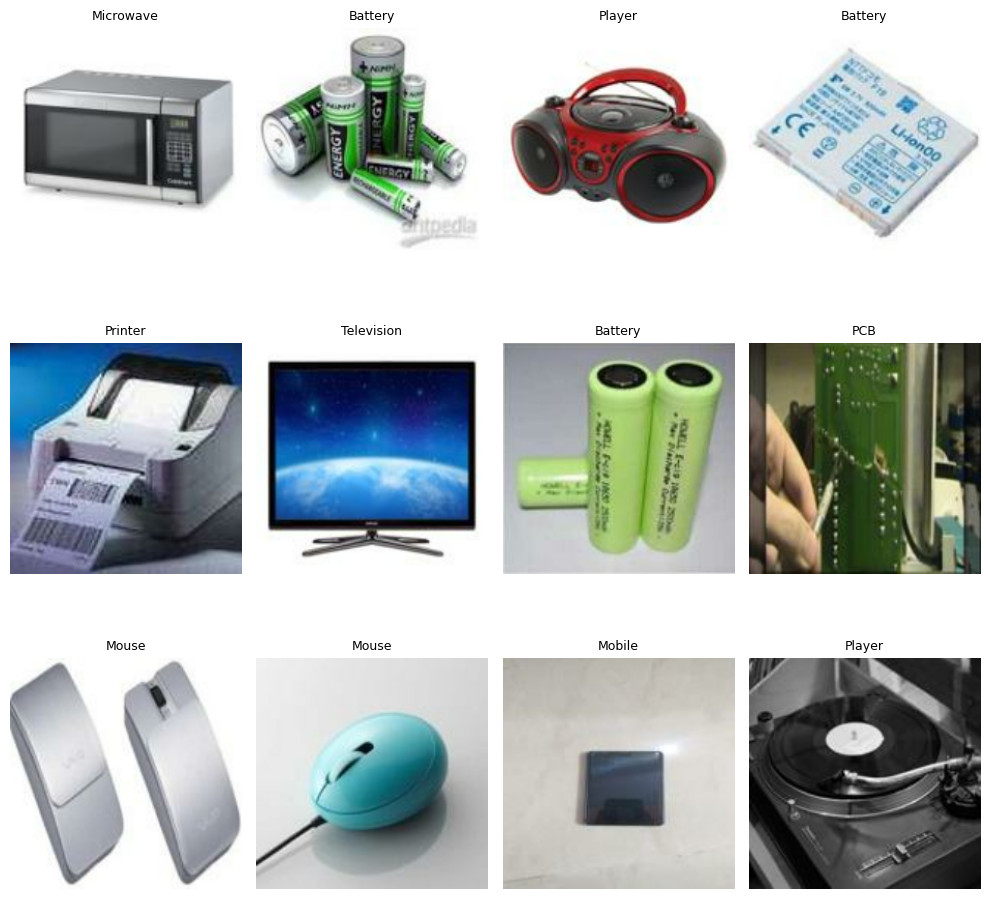

In [ ]:
def show_dataset_samples(dataset, class_names, num_images=12):

    plt.figure(figsize=(10, 10))
    rows = (num_images + 3) // 4  # Adjust rows for grid

    for images, labels in dataset.take(1):
        for i in range(min(num_images, len(images))):
            ax = plt.subplot(rows, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]], fontsize=9)
            plt.axis("off")

    plt.tight_layout()
    plt.show()
show_dataset_samples(datatrain, class_names)


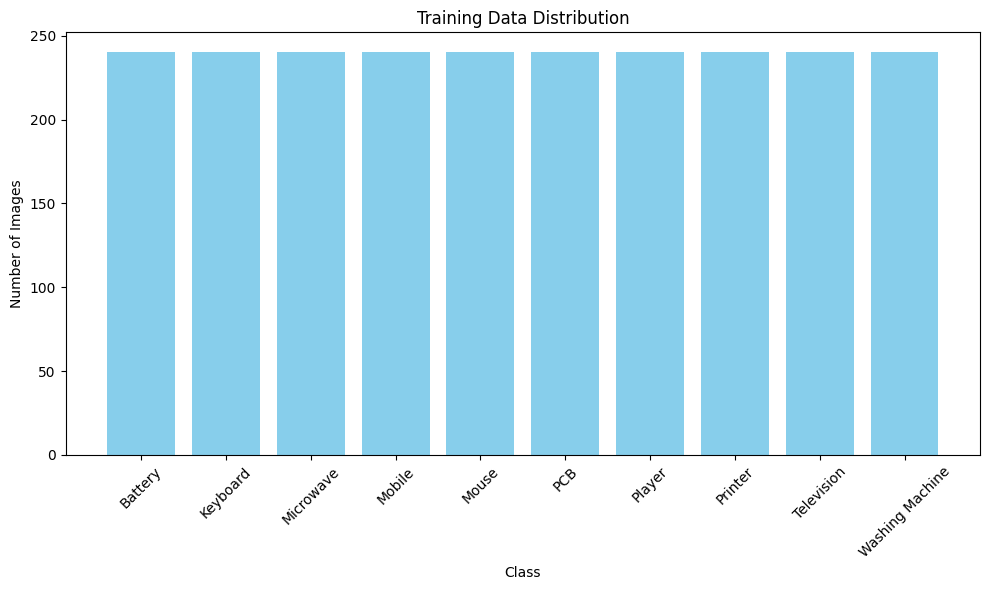

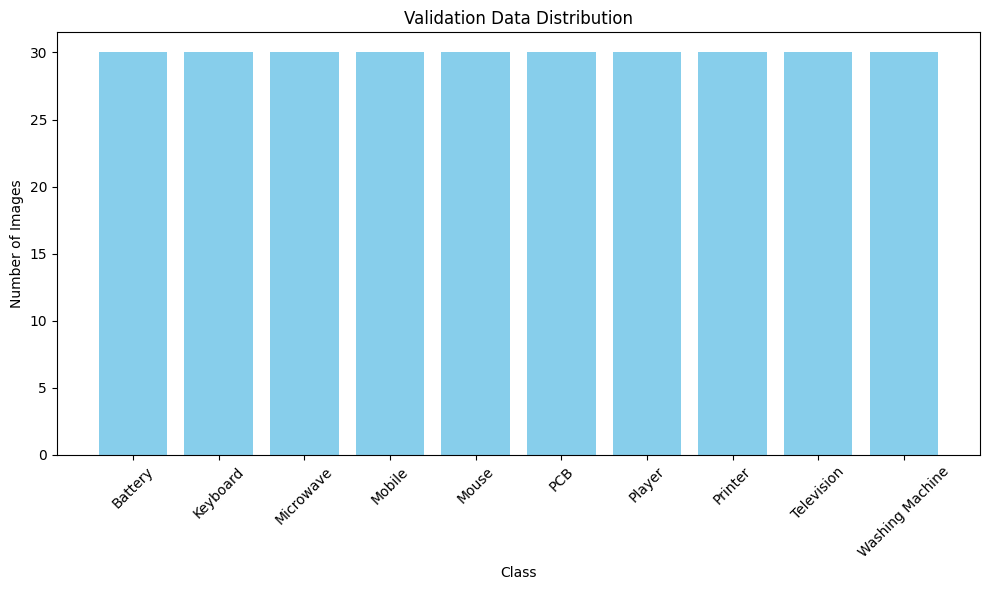

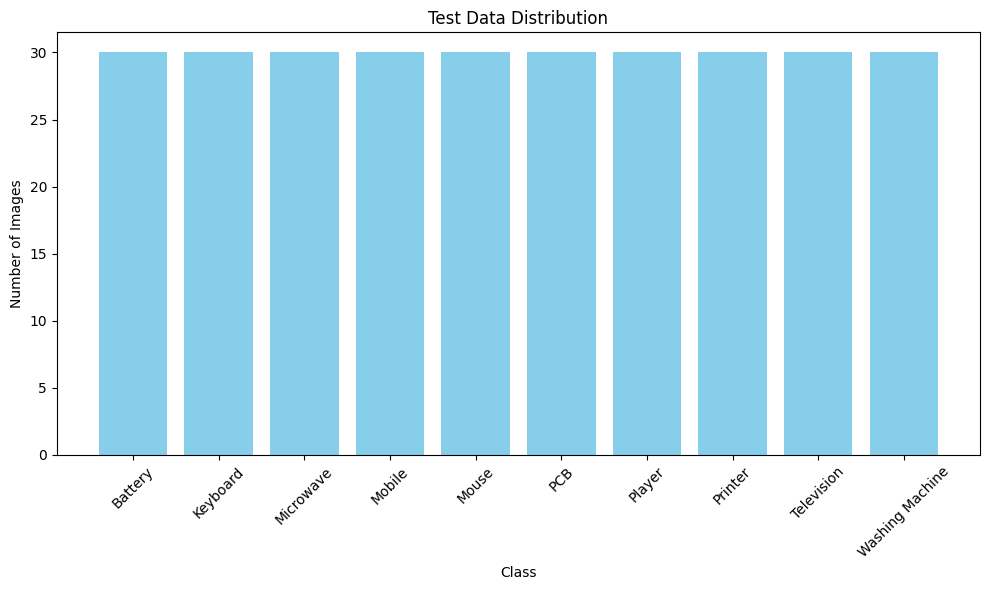

In [ ]:
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object (e.g., datatrain, datavalid, datatest)
        title: Title for the plot (default = 'Class Distribution')
    """
    class_counts = {name: 0 for name in dataset.class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_name = dataset.class_names[label]
            class_counts[class_name] += 1

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(factor=0.2),
    tf.keras.layers.RandomCrop(height=224, width=224),  # Optional, adjust to your image size
    tf.keras.layers.Rescaling(1./255),  # Normalization
])

In [ ]:
# Create Model with MobileNetV3
base_model = MobileNetV3Large(include_top=False, input_shape=(224, 224, 3), weights="imagenet")
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#TrainModel
history = model.fit(datatrain, validation_data=datavalid, epochs=10)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.7171 - loss: 0.8943 - val_accuracy: 0.9233 - val_loss: 0.1728
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9581 - loss: 0.1494 - val_accuracy: 0.9533 - val_loss: 0.1516
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9712 - loss: 0.0783 - val_accuracy: 0.9667 - val_loss: 0.1253
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9885 - loss: 0.0402 - val_accuracy: 0.9567 - val_loss: 0.1351
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9902 - loss: 0.0347 - val_accuracy: 0.9567 - val_loss: 0.1481
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9961 - loss: 0.0186 - val_accuracy: 0.9533 - val_loss: 0.1547
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9991 - loss: 0.0121 - val_accuracy: 0.9600 - val_loss: 0.1522
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9999 - loss: 0.0095 - val_accuracy: 0

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       246,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,112 (14.28 MB)

 Trainable params: 248,586 (971.04 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

 Optimizer params: 497,174 (1.90 MB)

In [ ]:
base_model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling_1[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 112, 112,  │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 113, 113,  │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        256 │ expanded_conv_1_

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,996,352 (11.43 MB)

In [ ]:
#Evaluation
loss, accuracy = model.evaluate(datatest)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9551 - loss: 0.1064
Test Accuracy: 0.9667, Test Loss: 0.1009


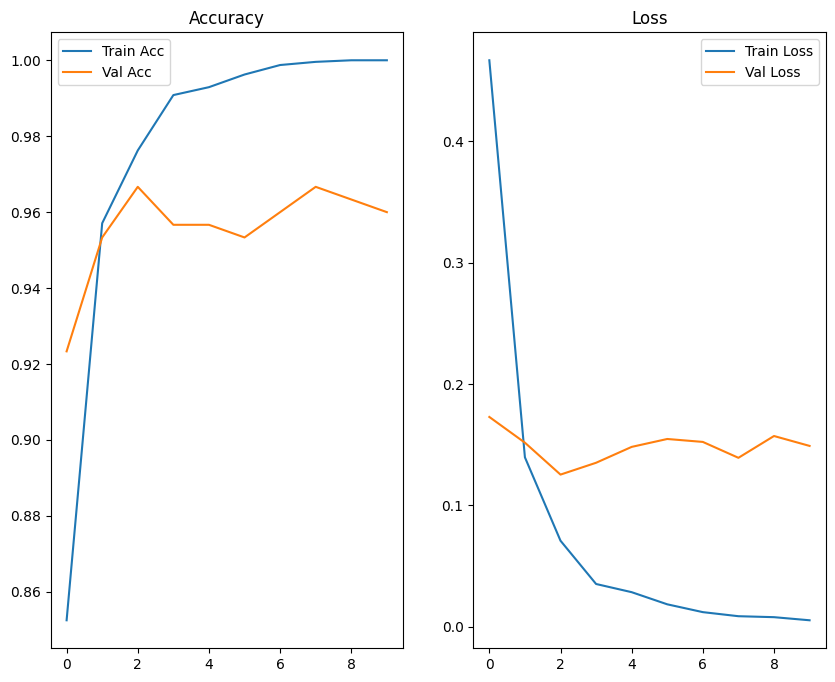

In [ ]:
# Plot Metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc')
plt.plot(epochs_range, val_acc, label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix
y_true = np.concatenate([y.numpy() for x, y in datatest])
y_pred_probs = model.predict(datatest)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


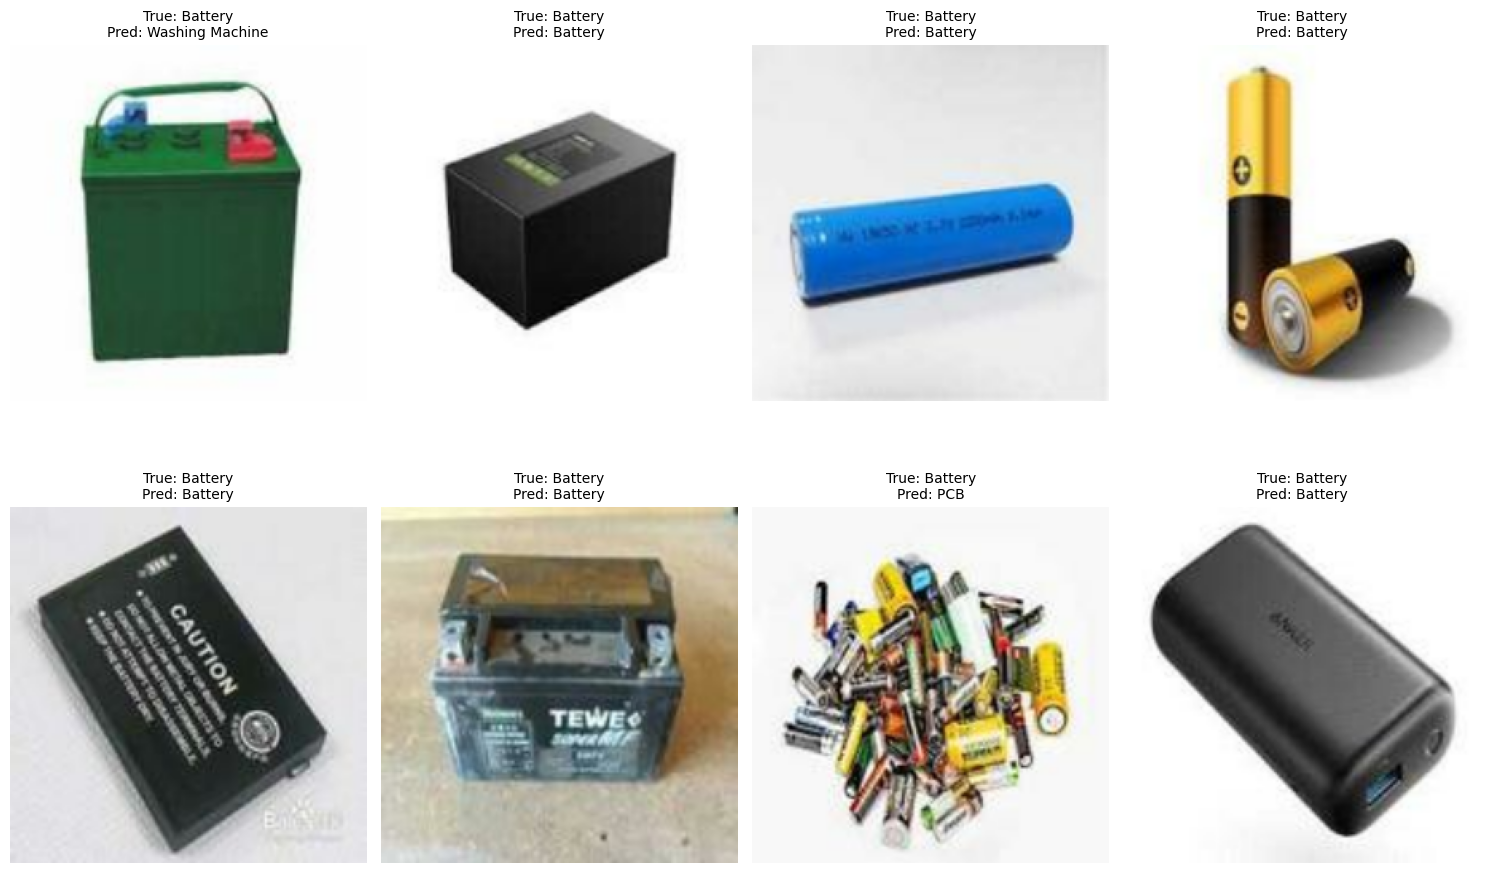

In [ ]:
def show_sample_predictions(dataset, model, class_names, num_samples=8):

    plt.figure(figsize=(15, 10))

    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        pred_labels = tf.argmax(predictions, axis=1)

        for i in range(min(num_samples, len(images))):
            plt.subplot(2, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[labels[i]]
            pred_label = class_names[pred_labels[i]]
            plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

show_sample_predictions(datatest, model, class_names)

In [ ]:
# Save & Reload Model
model.save('MobileNetV3_model.keras')
model = tf.keras.models.load_model('MobileNetV3_model.keras')

In [ ]:
# Gradio Interface
def classify_image(img):
    img = img.resize((224, 224))
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    confidences = {class_names[i]: float(prediction[i]) for i in range(len(class_names))}
    return confidences

In [ ]:
# Enhanced UI
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="E-Waste Image Classifier 🔍",
    description="Upload an image of an electronic item (e.g., Battery, Mouse, Printer...) to classify it using a MobileNetV3-powered model.",
    examples=[],
    allow_flagging="never"
)

iface.launch()